In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

## Features to drop and keep - Flights table

In [2]:
flights = pd.read_csv(r"../data/flights_2019.csv")

In [5]:
flights.shape

(7545488, 43)

In [7]:
flights.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [8]:
flights.drop(columns=['Unnamed: 0'],inplace=True)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-14,AA,AA_CODESHARE,AA,4867,PT,N639AE,4867,14321,PWM,...,364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-14,AA,AA_CODESHARE,AA,4868,PT,N609DP,4868,12945,LEX,...,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-14,AA,AA_CODESHARE,AA,4869,PT,N628AE,4869,12323,ILM,...,413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-14,AA,AA_CODESHARE,AA,4869,PT,N628AE,4869,14100,PHL,...,413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-14,AA,AA_CODESHARE,AA,4870,PT,N645AE,4870,13933,ORH,...,241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

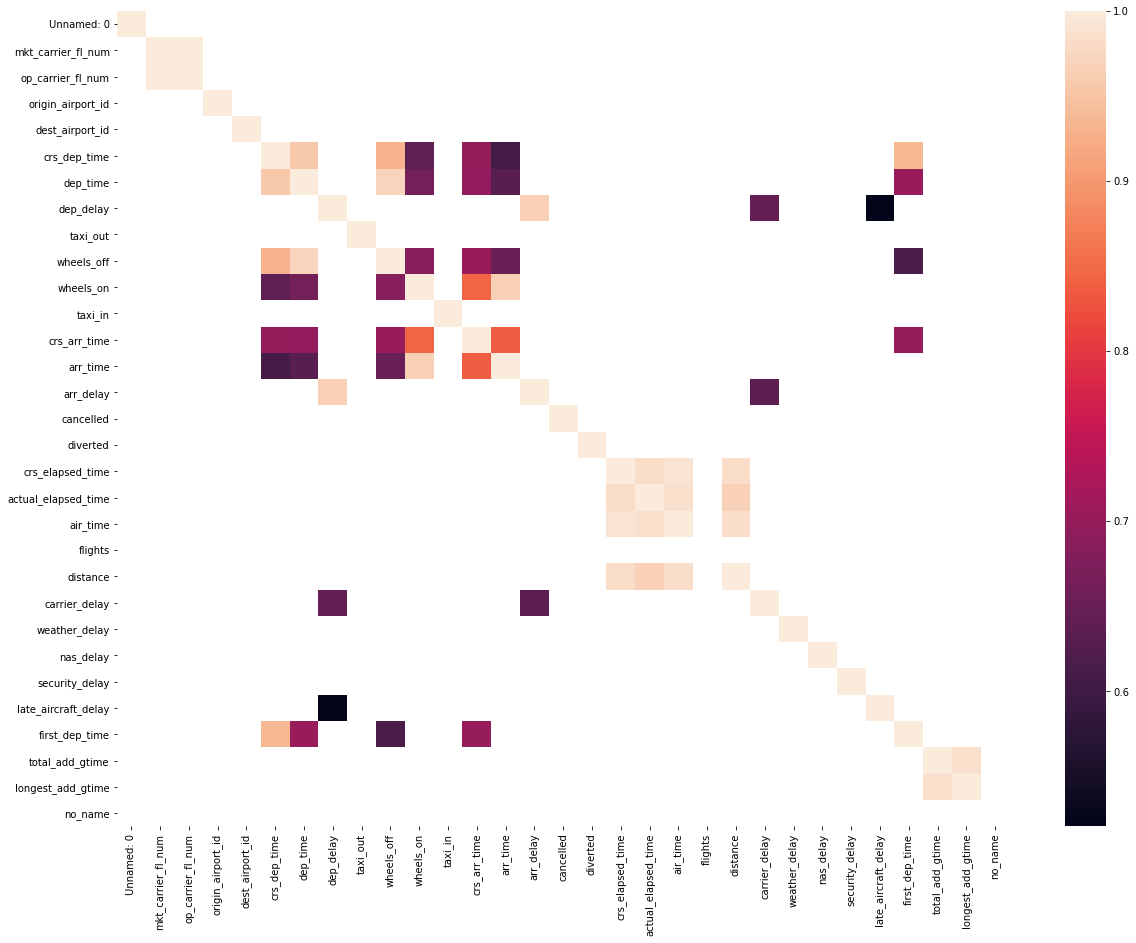

In [8]:
plt.rcParams["figure.figsize"] = (20,15)
cor = flights.corr()
sns.heatmap(cor[(cor>0.5) | (cor<-0.5)])

In [112]:
# Columns we decided to drop from "flights" table
# mkt_unique_carrier <== mkt_unique_carrier,
# mkt_unique_carrier ==> op_unique_carrier
# dest_city_name, dest ==> dest_id
# origin_city_name, origin ==> origin_id


# columns which we are going to drop but are not repetitive
columns_to_drop = ["branded_code_share","mkt_carrier","mkt_carrier_fl_num","flights","dest_city_name","dest",
                   "origin_city_name","origin","first_dep_time",
                   "longest_add_gtime","cancellation_code","distance","crs_elapsed_time","crs_arrival_time","crs_departure_time",
                  "arr_time","air_time","actual_elapsed_time","cancelled","diverted","taxi_in","taxi_out"]

In [14]:
flights.mkt_unique_carrier.nunique()

10

In [15]:
flights.op_unique_carrier.nunique()

26

In [20]:
# Let's keep both features - Hot encode
flights[["mkt_unique_carrier","op_unique_carrier"]].reindex(columns=["mkt_unique_carrier","op_unique_carrier"]).value_counts()

mkt_unique_carrier  op_unique_carrier
WN                  WN                   1271786
DL                  DL                    927459
AA                  AA                    880688
UA                  UA                    584541
DL                  OO                    323628
AA                  MQ                    305093
UA                  OO                    288329
B6                  B6                    276909
AA                  OH                    269140
AS                  AS                    248136
DL                  9E                    239374
NK                  NK                    191858
AA                  YX                    138148
F9                  F9                    126308
UA                  EV                    124097
AA                  OO                    116606
                    PT                    114665
AS                  QX                    113376
AA                  YV                    108284
UA                  YX         

In [23]:
flights.iloc[45637]

fl_date                  2019-11-16
mkt_unique_carrier               UA
branded_code_share     UA_CODESHARE
mkt_carrier                      UA
mkt_carrier_fl_num             3989
op_unique_carrier                EV
tail_num                     N13979
op_carrier_fl_num              3989
origin_airport_id             10792
origin                          BUF
origin_city_name        Buffalo, NY
dest_airport_id               13930
dest                            ORD
dest_city_name          Chicago, IL
crs_dep_time                   1055
dep_time                     1045.0
dep_delay                     -10.0
taxi_out                       11.0
wheels_off                   1056.0
wheels_on                    1122.0
taxi_in                        19.0
crs_arr_time                   1205
arr_time                     1141.0
arr_delay                     -24.0
cancelled                       0.0
cancellation_code               NaN
diverted                        0.0
dup                         

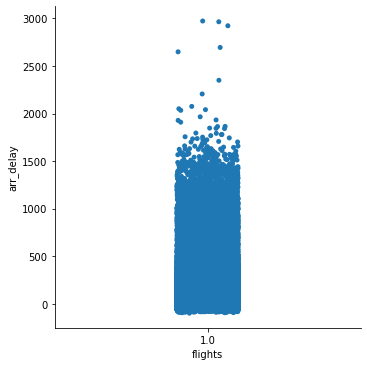

In [24]:
sns.catplot(x="flights",y="arr_delay",data=flights)

In [25]:
flights.first_dep_time.nunique()

1304

In [27]:
flights.first_dep_time.isna().sum()/len(flights) # 

0.992939489135759

<AxesSubplot:xlabel='first_dep_time', ylabel='arr_delay'>

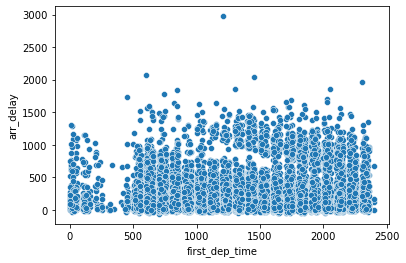

In [29]:
# we are dropping this because there's no underlying pattern here
sns.scatterplot(x="first_dep_time",y="arr_delay",data=flights)

In [32]:
flights.longest_add_gtime.isna().sum()/len(flights)

0.9929396216652919

<AxesSubplot:xlabel='longest_add_gtime', ylabel='total_add_gtime'>

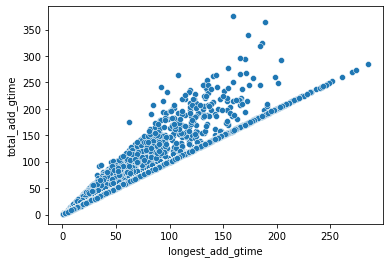

In [38]:
# Both the features  are correlaTed - droping longes_add_gtime
sns.scatterplot(x='longest_add_gtime',y='total_add_gtime',data=flights)

In [44]:
ser_cancellation_codes = flights.cancellation_code.fillna(value='U')

In [39]:
flights.cancellation_code.isna().sum()

7403333

In [43]:
flights.cancellation_code.unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [49]:
ser_cancellation_codes.unique() #when we drop arr_delay with nan, we'll get rid of 'A','B','C','D' from cancellation-code

array(['U', 'A', 'B', 'C', 'D'], dtype=object)

In [50]:
data_test = flights[["cancellation_code","arr_delay"]]

In [52]:
data_test.dropna(subset=['arr_delay']).cancellation_code.unique()

array([nan], dtype=object)

<AxesSubplot:xlabel='cancellation_code', ylabel='arr_delay'>

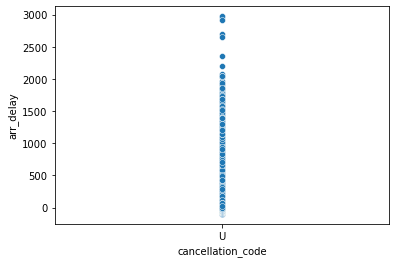

In [48]:
sns.scatterplot(x=ser_cancellation_codes,y= flights.arr_delay)

<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

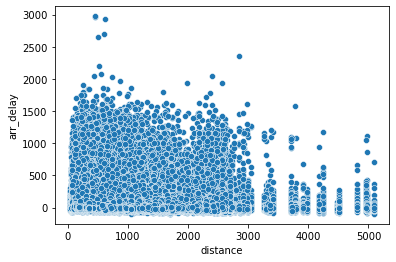

In [56]:
# From wheels up to wheels down all the 'pilots' take SAME amount of time to fly from A to B - No (TODO)
# Since we are considering only "signinificant delays"- distance does not have effect on arr_delay in grand scheme of things
sns.scatterplot(x="distance",y="arr_delay",data=flights)

In [55]:
flights[["distance","arr_delay"]].corr()

,distance,arr_delay
distance,1.000000,-0.008301
arr_delay,-0.008301,1.000000


<AxesSubplot:xlabel='crs_elapsed_time', ylabel='arr_delay'>

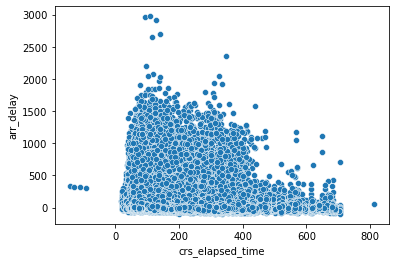

In [58]:
# Drop all "crs" - Because that's scheduled to happen during booking
sns.scatterplot(x="crs_elapsed_time",y="arr_delay",data=flights)

In [104]:
# Not related to target variable
flights[["actual_elapsed_time","arr_delay"]].corr()

,actual_elapsed_time,arr_delay
actual_elapsed_time,1.000000,0.049456
arr_delay,0.049456,1.000000


In [ ]:
# Not related to target variable
flights[["","arr_delay"]].corr()

In [106]:
data_test = flights[["cancelled","arr_delay"]]

In [107]:
data_test.dropna(subset=["arr_delay"])["cancelled"].unique()

array([0.])

In [108]:
data_test = flights[["diverted","arr_delay"]]

In [109]:
data_test.dropna(subset=["arr_delay"])["diverted"].unique()

array([0.])

<AxesSubplot:xlabel='air_time', ylabel='arr_delay'>

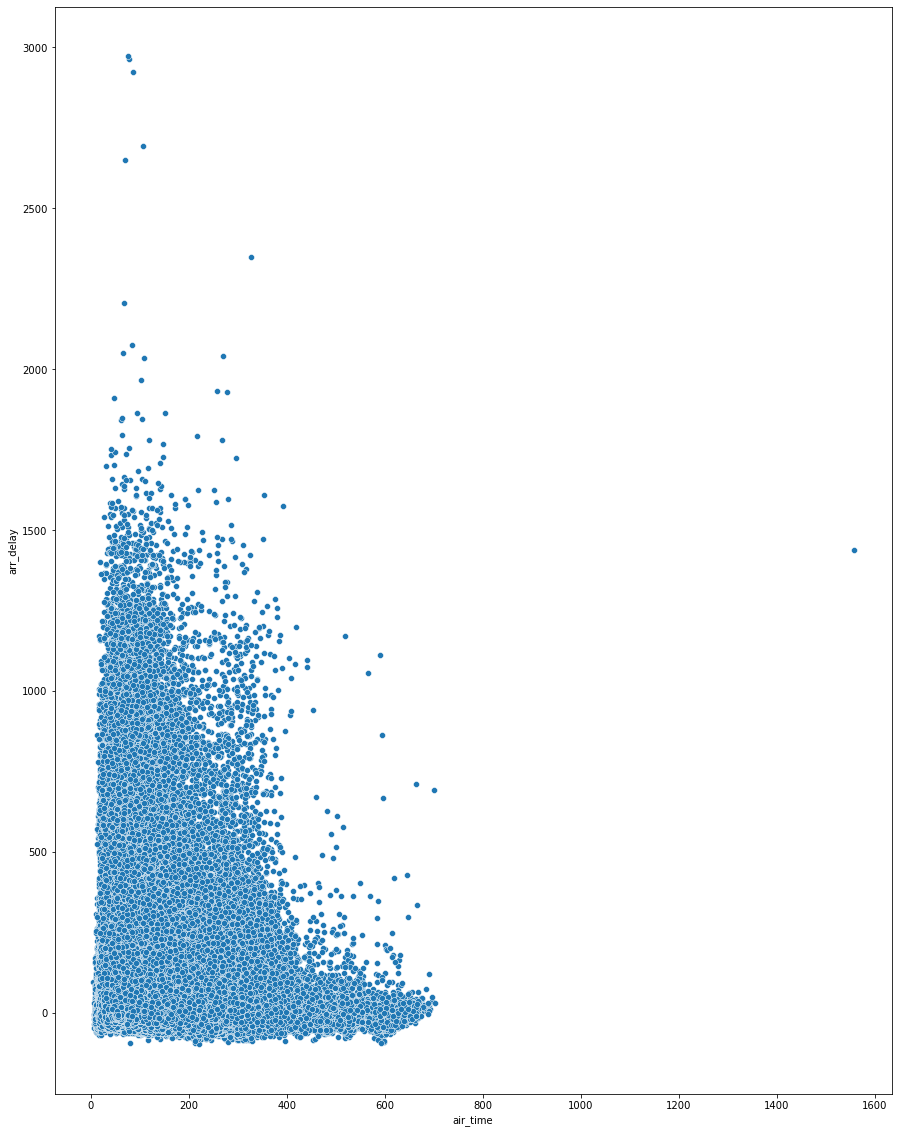

In [99]:
sns.scatterplot(x=flights.air_time,y=flights.arr_delay)

<AxesSubplot:xlabel='actual_elapsed_time', ylabel='arr_delay'>

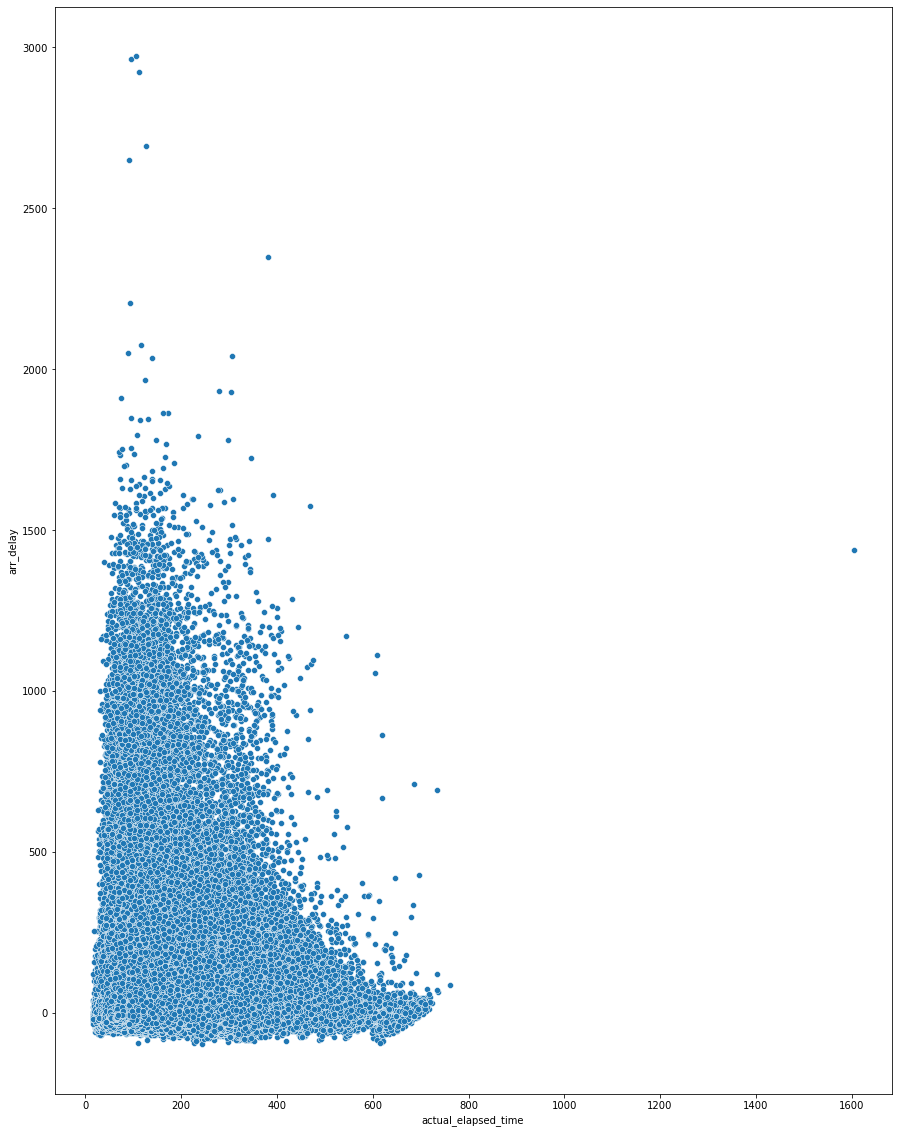

In [102]:
sns.scatterplot(x=flights.actual_elapsed_time,y=flights.arr_delay)

In [101]:
#drop this because no correlation with the target variable
flights[["air_time","arr_delay"]].corr()

,air_time,arr_delay
air_time,1.00000,0.00979
arr_delay,0.00979,1.00000


## Features decided to keep - flights

In [3]:
flights.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [4]:
flights.iloc[0]

Unnamed: 0                            0
fl_date                      2019-11-14
mkt_unique_carrier                   AA
branded_code_share         AA_CODESHARE
mkt_carrier                          AA
mkt_carrier_fl_num                 4867
op_unique_carrier                    PT
tail_num                         N639AE
op_carrier_fl_num                  4867
origin_airport_id                 14321
origin                              PWM
origin_city_name           Portland, ME
dest_airport_id                   14100
dest                                PHL
dest_city_name         Philadelphia, PA
crs_dep_time                       1040
dep_time                         1033.0
dep_delay                          -7.0
taxi_out                           17.0
wheels_off                       1050.0
wheels_on                        1209.0
taxi_in                             8.0
crs_arr_time                       1220
arr_time                         1217.0
arr_delay                          -3.0


In [ ]:
columns_to_keep = ["fl_date","op_unique_carrier","mkt_unique_carrier", "op_carrier_fl_num","carrier_delay","weather_delay",
                   "nas_delay","security_delay","late_aircraft_delay","dep_delay"]

In [53]:
# "fl_date" - date might have some significance with arr_delay.
# example: If there'sa govt rule on 2020-01-01 to not fly for 5 minsat 10AM. 
# ALl flights get delayed by that amount in every airport

In [57]:
flights.crs_elapsed_time

0          100.0
1          100.0
2           93.0
3           94.0
4           89.0
           ...  
7545483    195.0
7545484    195.0
7545485    315.0
7545486    200.0
7545487    115.0
Name: crs_elapsed_time, Length: 7545488, dtype: float64

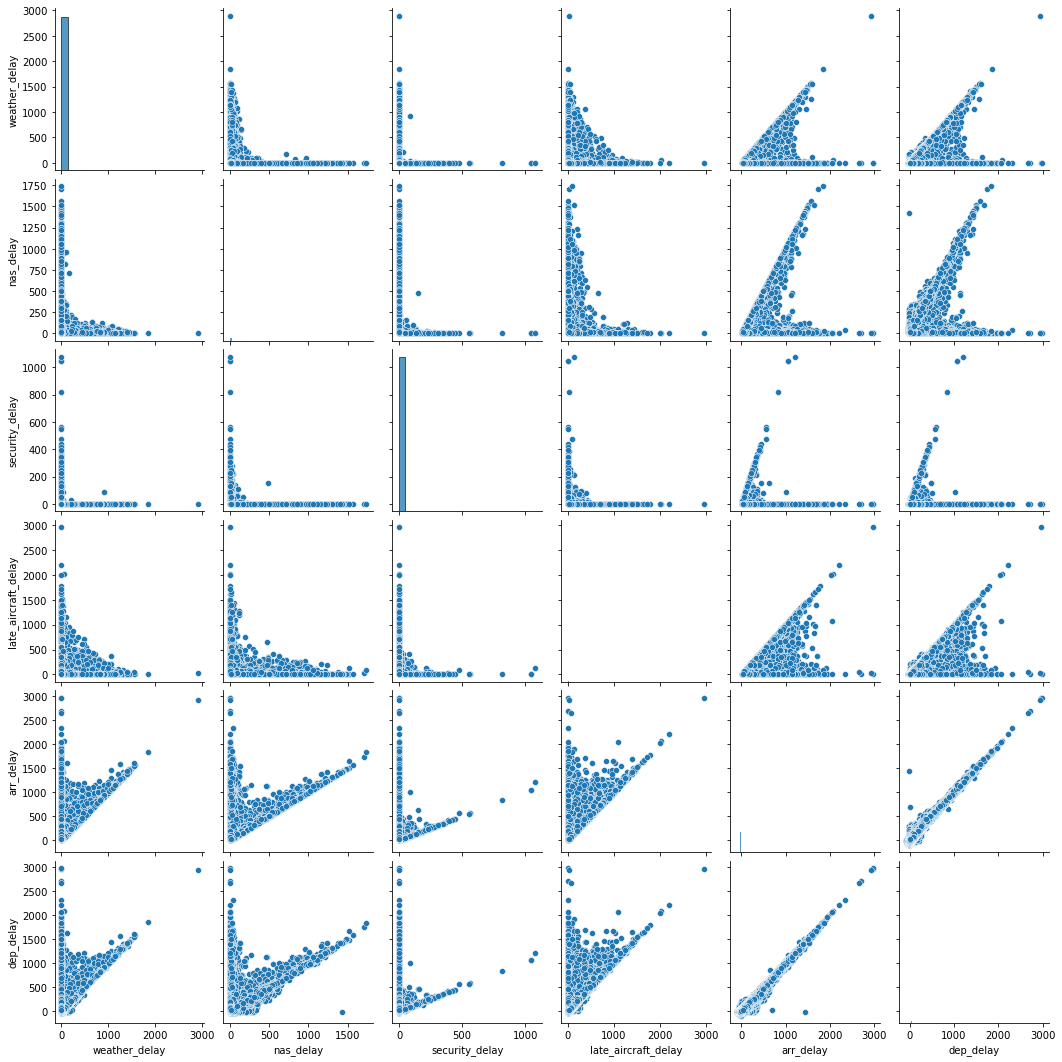

In [59]:
sns.pairplot(data=flights[["weather_delay",
                   "nas_delay","security_delay","late_aircraft_delay","arr_delay","dep_delay"]])

<AxesSubplot:ylabel='arr_delay'>

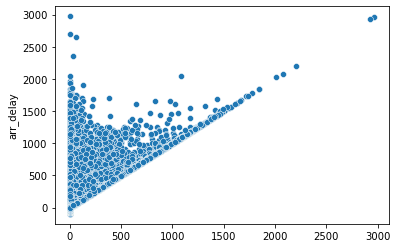

In [61]:
sns.scatterplot(x=flights[["weather_delay",
                   "nas_delay","security_delay","late_aircraft_delay"]].sum(axis=1),y=flights.arr_delay)

<AxesSubplot:ylabel='dep_delay'>

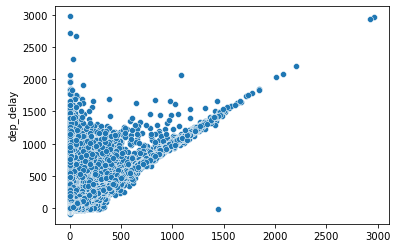

In [64]:
sns.scatterplot(x=flights[["weather_delay",
                   "nas_delay","security_delay","late_aircraft_delay","missing_delay"]].sum(axis=1),y=flights.dep_delay)

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

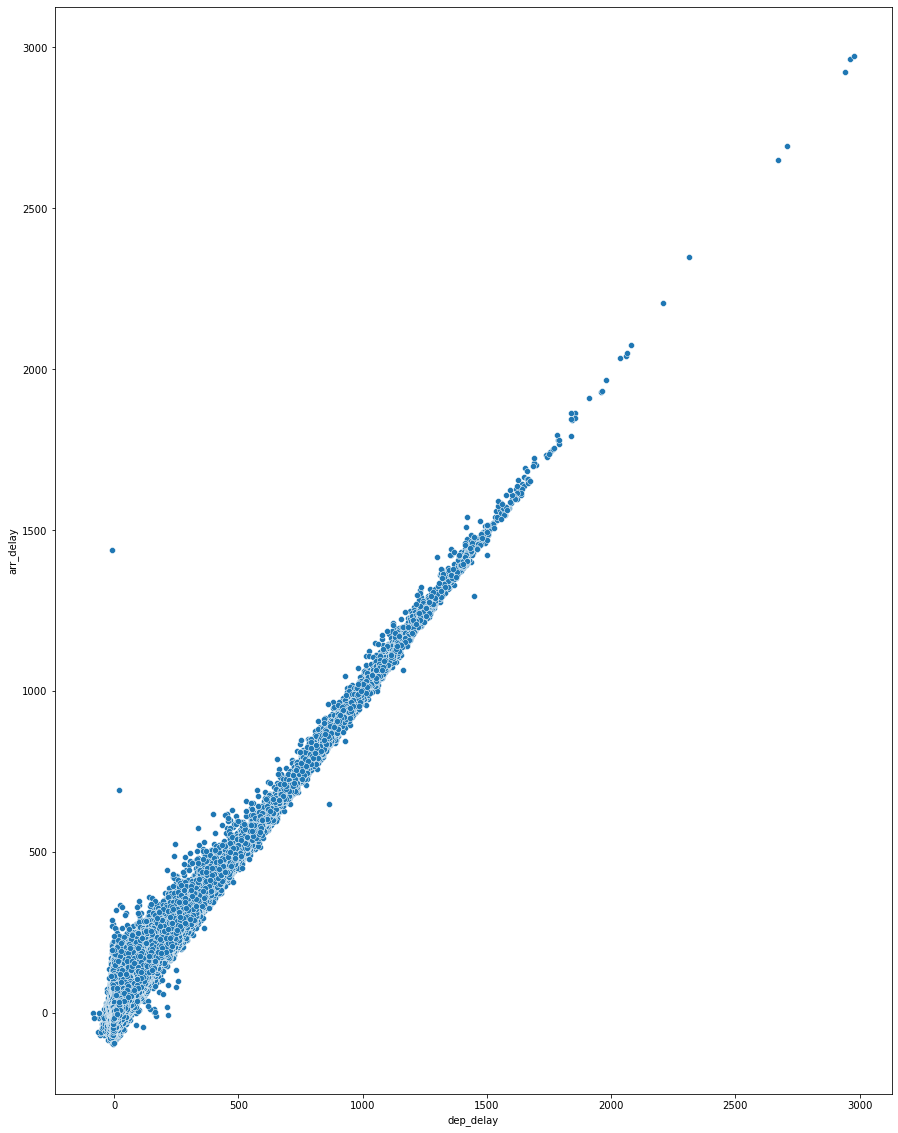

In [65]:
plt.rcParams["figure.figsize"] = (15,20)
sns.scatterplot(x=flights.dep_delay,y=flights.arr_delay)

In [110]:
flights[["taxi_in","taxi_out","arr_delay"]].corr()  #0 = not at all correlated ; 1- highly correlated

,taxi_in,taxi_out,arr_delay
taxi_in,1.000000,0.016475,0.102343
taxi_out,0.016475,1.000000,0.219616
arr_delay,0.102343,0.219616,1.000000


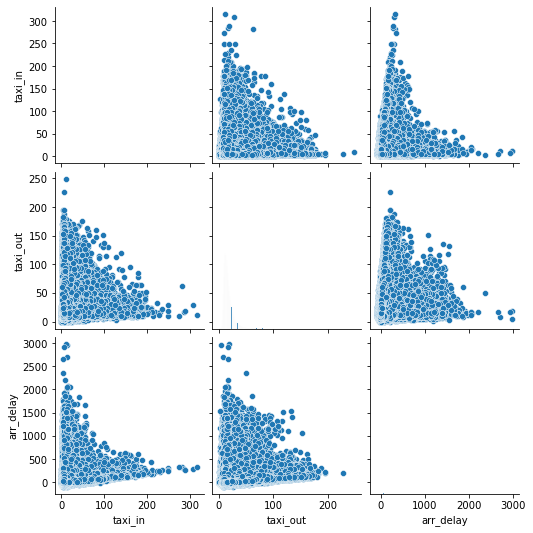

In [111]:
sns.pairplot(flights[["taxi_in","taxi_out","arr_delay"]]) #no correlation - drop them

# Get new features out of these variables and then DROP the features

In [115]:
#get weather type from dep_time,origin_city and drop both variables

In [116]:
#get weather type from arr-time,destination_city and drop both varaibles

In [117]:
flights.iloc[0]

fl_date                      2019-11-14
mkt_unique_carrier                   AA
branded_code_share         AA_CODESHARE
mkt_carrier                          AA
mkt_carrier_fl_num                 4867
op_unique_carrier                    PT
tail_num                         N639AE
op_carrier_fl_num                  4867
origin_airport_id                 14321
origin                              PWM
origin_city_name           Portland, ME
dest_airport_id                   14100
dest                                PHL
dest_city_name         Philadelphia, PA
crs_dep_time                       1040
dep_time                         1033.0
dep_delay                          -7.0
taxi_out                           17.0
wheels_off                       1050.0
wheels_on                        1209.0
taxi_in                             8.0
crs_arr_time                       1220
arr_time                         1217.0
arr_delay                          -3.0
cancelled                           0.0


### Get number of flights supposed to land in the airport csr_departure_time-(1 hour) in airport

In [9]:
flights.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [ ]:
def get_schdl_arr_fl_qt(df,minutes=20):
    
    
    
flights.groupby(by=['fl_date','origin_airport_id','mkt_unique_carrier']).apply(get_schdl_arr_fl_qt,minutes=60)

In [49]:
flights.loc[:,["fl_date","crs_arr_time","crs_dep_time"]] = flights[["fl_date","crs_arr_time","crs_dep_time"]].astype('string')

In [61]:
flights["fl_date"]+" "+ flights["crs_arr_time"].str.zfill(4)

0          2019-11-14 1220
1          2019-11-14 1215
2          2019-11-14 1955
3          2019-11-14 1757
4          2019-11-14 1738
                ...       
7545483    2019-02-17 1855
7545484    2019-02-17 1000
7545485    2019-02-17 1850
7545486    2019-02-17 1830
7545487    2019-02-17 2015
Length: 7545488, dtype: string

In [74]:
arr_dates = flights["fl_date"]+" "+ flights["crs_arr_time"].str.zfill(4).replace({'2400':'0000'})

In [76]:
pd.to_datetime(arr_dates[:])

0         2019-11-14 12:20:00
1         2019-11-14 12:15:00
2         2019-11-14 19:55:00
3         2019-11-14 17:57:00
4         2019-11-14 17:38:00
                  ...        
7545483   2019-02-17 18:55:00
7545484   2019-02-17 10:00:00
7545485   2019-02-17 18:50:00
7545486   2019-02-17 18:30:00
7545487   2019-02-17 20:15:00
Length: 7545488, dtype: datetime64[ns]

In [78]:
arr_time = pd.to_datetime(flights["fl_date"]+" "+ flights["crs_arr_time"].str.zfill(4).replace({'2400':'0000'}))

In [79]:
dep_time = pd.to_datetime(flights["fl_date"]+" "+ flights["crs_dep_time"].str.zfill(4).replace({'2400':'0000'}))

In [81]:
flights["arr_date_time"] = arr_time

In [82]:
flights["dep_date_time"] = dep_time

In [83]:
test = flights[(flights.fl_date=='2019-11-14')&(flights.origin_airport_id==14321) & (flights.mkt_unique_carrier == 'AA')]
test

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,arr_date_time,dep_date_time
0,0,2019-11-14,AA,AA_CODESHARE,AA,4867,PT,N639AE,4867,14321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-14 12:20:00,2019-11-14 10:40:00
819,819,2019-11-14,AA,AA_CODESHARE,AA,4373,YX,N425YX,4373,14321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-14 19:29:00,2019-11-14 17:57:00
837,837,2019-11-14,AA,AA_CODESHARE,AA,4388,YX,N429YX,4388,14321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-14 15:58:00,2019-11-14 14:05:00
855,855,2019-11-14,AA,AA_CODESHARE,AA,4402,YX,N123HQ,4402,14321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-14 20:04:00,2019-11-14 18:23:00
2324,2324,2019-11-14,AA,AA_CODESHARE,AA,4740,PT,N659AE,4740,14321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-14 21:18:00,2019-11-14 19:26:00


In [88]:
c = test[["op_carrier_fl_num","arr_date_time","dep_date_time"]].sort_values(by=["dep_date_time"])
c

,op_carrier_fl_num,arr_date_time,dep_date_time
0,4867,2019-11-14 12:20:00,2019-11-14 10:40:00
837,4388,2019-11-14 15:58:00,2019-11-14 14:05:00
819,4373,2019-11-14 19:29:00,2019-11-14 17:57:00
855,4402,2019-11-14 20:04:00,2019-11-14 18:23:00
2324,4740,2019-11-14 21:18:00,2019-11-14 19:26:00


In [91]:
for _,row in c.iterrows():
   print((c.arr_date_time < row.dep_date_time).sum())

0
1
2
2
2


### Linear Regression fit with just dep_delay and get score

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split, GridSearchCV

In [97]:
data_test = flights[["dep_delay","arr_delay"]]

In [98]:
data_test.corr()

,dep_delay,arr_delay
dep_delay,1.000000,0.964524
arr_delay,0.964524,1.000000


In [90]:
data_test.shape

(7545488, 2)

In [91]:
data_test.isna().sum()

dep_delay    136813
arr_delay    161830
dtype: int64

In [92]:
data_test = data_test.dropna()

In [93]:
data_test.shape

(7383658, 2)

In [94]:
X = data_test.dep_delay.to_numpy().reshape(-1,1)
y = data_test.arr_delay

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [96]:
clf = LinearRegression()
model = GridSearchCV(clf,param_grid={})
model.fit(X_train,y_train)
r2_score(y_test,model.predict(X_test))

0.9310637464276812

In [88]:
# All the other features we add should boost our model score  higher than 93%

In [ ]:
#If we know dep_delay, we can predict arr_delay by 93%

In [125]:
data_test = flights[["dep_delay","arr_delay","op_unique_carrier","mkt_unique_carrier"]]

In [126]:
data_test = data_test.dropna()

In [127]:
data_test = pd.get_dummies(data=data_test,columns=["op_unique_carrier","mkt_unique_carrier"])

In [128]:
data_test.shape

(7383658, 38)

In [129]:
X = data_test.drop(columns=["arr_delay"])
y = data_test.arr_delay

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [132]:
clf = LinearRegression()
model = GridSearchCV(clf,param_grid={})
model.fit(X_train,y_train)
r2_score(y_test,model.predict(X_test))

0.9318112168571508